In [1]:
from selenium import webdriver
import time
from selenium.webdriver.common.by import By
from functools import reduce
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from transformers import pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D, Dense, Concatenate
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
import spacy

## Web Scraping

In [387]:
urls = ['https://www.tripadvisor.pt/Restaurant_Review-g189158-d1520116-Reviews-Floresta_Das_Escadinhas-Lisbon_Lisbon_District_Central_Portugal.html',
    'https://www.tripadvisor.pt/Restaurant_Review-g189158-d21254853-Reviews-O_Portugues_Chiado-Lisbon_Lisbon_District_Central_Portugal.html',
    'https://www.tripadvisor.pt/Restaurant_Review-g189158-d1776025-Reviews-Adega_das_Gravatas-Lisbon_Lisbon_District_Central_Portugal.html',
       'https://www.tripadvisor.pt/Restaurant_Review-g189158-d3977146-Reviews-Restaurante_Os_Courenses-Lisbon_Lisbon_District_Central_Portugal.html',
       'https://www.tripadvisor.pt/Restaurant_Review-g189158-d3842807-Reviews-O_Prado-Lisbon_Lisbon_District_Central_Portugal.html',
       'https://www.tripadvisor.pt/Restaurant_Review-g189158-d2627097-Reviews-O_Magano-Lisbon_Lisbon_District_Central_Portugal.html',
       'https://www.tripadvisor.pt/Restaurant_Review-g189158-d2317379-Reviews-O_Velho_Eurico-Lisbon_Lisbon_District_Central_Portugal.html'
       ]

In [388]:
names_rest = ['Floresta das escadinhas', 'O Portugues Chiado', 'Adega das gravatas', 'Os Courenses', 'O prado', ' O magano', 'O velho eurico']

In [389]:
urls_worst = ['https://www.tripadvisor.pt/Restaurant_Review-g189158-d1390804-Reviews-Taverna_del_Rey-Lisbon_Lisbon_District_Central_Portugal.html#REVIEWS',
       'https://www.tripadvisor.pt/Restaurant_Review-g189158-d2174326-Reviews-Cafeteria_Sao_Nicolau-Lisbon_Lisbon_District_Central_Portugal.html',
       'https://www.tripadvisor.pt/Restaurant_Review-g189158-d12714847-Reviews-Made_in_Correeiros-Lisbon_Lisbon_District_Central_Portugal.html',
       'https://www.tripadvisor.pt/Restaurant_Review-g189158-d8037584-Reviews-Restaurante_Santo_Antao-Lisbon_Lisbon_District_Central_Portugal.html',
       'https://www.tripadvisor.pt/Restaurant_Review-g189158-d12786492-Reviews-Restaurante_Obrigado_Lisboa-Lisbon_Lisbon_District_Central_Portugal.html',
        'https://www.tripadvisor.pt/Restaurant_Review-g189158-d12994019-Reviews-Restaurante_Sao_Rafael-Lisbon_Lisbon_District_Central_Portugal.html',
       'https://www.tripadvisor.pt/Restaurant_Review-g189158-d25419065-Reviews-Il_Carpaccio-Lisbon_Lisbon_District_Central_Portugal.html',
       'https://www.tripadvisor.pt/Restaurant_Review-g189158-d13373138-Reviews-Restaurante_Contrabando-Lisbon_Lisbon_District_Central_Portugal.html',
       'https://www.tripadvisor.pt/Restaurant_Review-g189158-d10466923-Reviews-Vincenzo_s-Lisbon_Lisbon_District_Central_Portugal.html',
       'https://www.tripadvisor.pt/Restaurant_Review-g189158-d2190077-Reviews-Cafe_Nicola-Lisbon_Lisbon_District_Central_Portugal.html',
    'https://www.tripadvisor.pt/Restaurant_Review-g189158-d4232475-Reviews-Caminho_Da_Ronda-Lisbon_Lisbon_District_Central_Portugal.html',
    'https://www.tripadvisor.pt/Restaurant_Review-g189158-d2415839-Reviews-Comidas_de_Santiago-Lisbon_Lisbon_District_Central_Portugal.html',
    'https://www.tripadvisor.pt/Restaurant_Review-g189158-d1104924-Reviews-Sao_Miguel_D_alfama-Lisbon_Lisbon_District_Central_Portugal.html',
    'https://www.tripadvisor.pt/Restaurant_Review-g189158-d2079636-Reviews-Ja_Disse-Lisbon_Lisbon_District_Central_Portugal.html',
    'https://www.tripadvisor.pt/Restaurant_Review-g189158-d1569250-Reviews-Restaurante_Cervejaria_Ruca-Lisbon_Lisbon_District_Central_Portugal.html',
    'https://www.tripadvisor.pt/Restaurant_Review-g189158-d2484404-Reviews-Restaurante_Marisqueira_Popular-Lisbon_Lisbon_District_Central_Portugal.html',
    'https://www.tripadvisor.pt/Restaurant_Review-g189158-d8612489-Reviews-Retiro_dos_Sentidos-Lisbon_Lisbon_District_Central_Portugal.html',
    'https://www.tripadvisor.pt/Restaurant_Review-g189158-d4237025-Reviews-Taberna_a_Preciosa-Lisbon_Lisbon_District_Central_Portugal.html',
    'https://www.tripadvisor.pt/Restaurant_Review-g189158-d6677139-Reviews-Pastel_do_Fado-Lisbon_Lisbon_District_Central_Portugal.html',
    'https://www.tripadvisor.pt/Restaurant_Review-g189158-d2352995-Reviews-Benard_Pastelaria_e_Restaurante-Lisbon_Lisbon_District_Central_Portugal.html',
    'https://www.tripadvisor.pt/Restaurant_Review-g189158-d3387936-Reviews-Alfama_Grill-Lisbon_Lisbon_District_Central_Portugal.html',
    'https://www.tripadvisor.pt/Restaurant_Review-g189158-d1925513-Reviews-Tapas_Bar_52-Lisbon_Lisbon_District_Central_Portugal.html',
    'https://www.tripadvisor.pt/Restaurant_Review-g189158-d15520139-Reviews-Praia_no_Parque-Lisbon_Lisbon_District_Central_Portugal.html',
    'https://www.tripadvisor.pt/Restaurant_Review-g189158-d1830172-Reviews-Restaurante_Maritima_Das_Colunas-Lisbon_Lisbon_District_Central_Portugal.html',
    'https://www.tripadvisor.pt/Restaurant_Review-g189158-d11919168-Reviews-Dote_Alvalade-Lisbon_Lisbon_District_Central_Portugal.html',
    'https://www.tripadvisor.pt/Restaurant_Review-g189158-d3743141-Reviews-Namur_II-Lisbon_Lisbon_District_Central_Portugal.html']

In [390]:
names_rest_worst = ['Taverna del Rey', 'Cafeteria São Nicolau', 'Made in Correeiros', 'Restaurante Santo Antao', 'Restaurante Obrigado Lisboa', 'Sao Rafael', 'Il Carpacio', 'Contrabando', 'Vincenzo', 'Nicola', 'Caminho da Ronda', 'Comidas de Santiago', 'Sao Miguel D alfama', 'Ja Disse', 'Cervejaria Ruca', 'Restaurante Marisqueira Popular', ' Retiro dos sentidos', 'Taberna A Preciosa', 'Pastel do fado', 'Bernard Pastelaria e Restaurante', 'Alfama Grill', 'tapas Bar 52', 'Praia no Parque', 'Maritima das Colunas', 'Dote', 'Namur II']

In [204]:
def scrap_url(driver, ind, worst):
    #global list_reviews
    list_reviews = []
    lang = 'pt'
    while True:
        if worst == 'best':
            name_restaurant = names_rest[ind]
        else:
            name_restaurant = names_rest_worst[ind]
        time.sleep(2)
        page_reviews = driver.find_elements(By.CSS_SELECTOR, "div[data-automation='reviewCard']")
        try:
            driver.find_element(By.XPATH, "//span[contains(text(), 'Não')]").click()
        except:
            pass
        if len(page_reviews) > 0:
            for rev in page_reviews:
                name = rev.find_element(By.CSS_SELECTOR, "span[class='biGQs _P fiohW fOtGX']").text
                likes = rev.find_element(By.CSS_SELECTOR, "span[class='biGQs _P FwFXZ']").text
                review_title = rev.find_element(By.CSS_SELECTOR, "div[data-test-target='review-title']").text
                try:
                    date_and_type = rev.find_element(By.CSS_SELECTOR, "div[class='IlciT']").text.split(' • ')
                    date = date_and_type[0]
                    if len(date_and_type) > 1:
                        review_type = date_and_type[1]
                    else:
                        review_type = 'undefined'
                except:
                    date = 'undefined'
                    review_type = 'undefined'
                review_body = rev.find_element(By.CSS_SELECTOR, "div[data-test-target='review-body']").text.replace('\nLer mais', '')
                review_classification = rev.find_element(By.CSS_SELECTOR, "svg[class='evwcZ']").find_element(By.CSS_SELECTOR, "title").get_attribute('innerHTML')
                list_rev = [name, likes, review_title, date, review_type, review_body, review_classification, lang, name_restaurant]
                list_reviews.append(list_rev)
        else:
            print('saltou página')
        check_numbers = driver.find_element(By.CSS_SELECTOR, "div[class='Ci']").text.split('a ')[1].split(' de ')
        if int(check_numbers[0]) == int(check_numbers[1]):
            if lang == 'eng':
                print('check_numbers')
                break
            else:
                lang = 'eng'
                driver.find_element(By.CSS_SELECTOR, "button[aria-label*='LANGUAGE']").click()
                driver.find_element(By.XPATH, "//span[contains(text(), 'Inglês')]").click()            
        else:
            driver.find_element(By.CSS_SELECTOR, "a[aria-label='Página seguinte']").click()
    return list_reviews

In [ ]:
ind = 0
for url in urls:
    worst = 'best'
    driver = webdriver.Chrome()
    driver.get(url)
    driver.implicitly_wait(10)
    list_reviews = scrap_url(driver, ind, worst)
    print(len(list_reviews))
    driver.quit()
    temp_df = pd.DataFrame(list_reviews, columns = ['Name', 'Likes', 'Review_Title', 'Date', 'Review_Type', 'Review_Body', 'Review_Classification', 'Language', 'Restaurant_name'])
    if df_reviews.empty:
        df_reviews = temp_df
    else:
        df_reviews = pd.concat([df_reviews, temp_df], ignore_index=True)
    ind =+ 1

In [205]:
ind = 0
for url in urls_worst:
    worst = 'worst'
    driver = webdriver.Chrome()
    driver.get(url)
    driver.implicitly_wait(10)
    list_reviews = scrap_url(driver, ind, worst)
    print(len(list_reviews))
    driver.quit()
    temp_df = pd.DataFrame(list_reviews, columns = ['Name', 'Likes', 'Review_Title', 'Date', 'Review_Type', 'Review_Body', 'Review_Classification', 'Language', 'Restaurant_name'])
    if df_reviews.empty:
        df_reviews = temp_df
    else:
        df_reviews = pd.concat([df_reviews, temp_df], ignore_index=True)
    ind =+ 1

check_numbers
97


In [208]:
df_reviews.to_csv('tripAdvisor_reviews_complete_final.csv', index=False)

## Limpeza e tratamento de dados

In [385]:
df = pd.read_csv('tripAdvisor_reviews_complete_final.csv')
df

,Name,Likes,Review_Title,Date,Review_Type,Review_Body,Review_Classification,Language,Restaurant_name
0,Wagner B,0,ALMOÇO MARAVILHOSO,04/2025,family,Local excepcional. Todos os comentários feitos...,5 de 5 bolhas,pt,Floresta das escadinhas
1,Matheus A,0,Ótimo restaurante,04/2025,family,"Ótimo lugar, excelente comida, custo benefício...",5 de 5 bolhas,pt,Floresta das escadinhas
2,alan s,0,Excepcional,04/2025,couples,"Restaurante muito bom, agradavel e a manuela n...",5 de 5 bolhas,pt,Floresta das escadinhas
3,Felipe A,0,Uma ótima opção no centro,04/2025,couples,"Tivemos uma ótima experiência, o atendimento é...",5 de 5 bolhas,pt,Floresta das escadinhas
4,Lízzie F,0,Boa comida e preço,04/2025,friends,Fomos muito bem recebidas pelo Augusto \nÓtima...,5 de 5 bolhas,pt,Floresta das escadinhas
...,...,...,...,...,...,...,...,...,...
13250,Jerzy1969,0,They have lost attention to food quality and C...,undefined,undefined,We have stoopped for small meal with kids- had...,2 de 5 bolhas,eng,Nicola
13251,Valerie G,0,Try another restaurant,08/2011,none,We stayed in a hotel along the Avenida Liberda...,2 de 5 bolhas,eng,Nicola
13252,J and d.,0,Great location for Dining in Central Lisbon,09/2011,none,The location on a main square in Lisbon makes ...,4 de 5 bolhas,eng,Nicola
13253,fridayinla,0,Average dining with below average service.,undefined,undefined,Although the restaurant has a charmingly class...,3 de 5 bolhas,eng,Nicola


In [361]:
df['Review_Classification'] = df['Review_Classification'].str.replace(r'(\d+)\s+de\s+(\d+)\s+bolhas', r'\1/\2', regex=True)

In [362]:
df['Review_Classification'] = df['Review_Classification'].str.extract(r'(\d)/5').astype(int)

In [6]:
df['Review_Classification'].value_counts()

5    5746
1    2675
4    2595
3    1224
2    1015
Name: Review_Classification, dtype: int64

In [364]:
#nltk.download('punkt')
#nltk.download('stopwords')

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('portuguese'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['comentario_limpo'] = df['Review_Body'].apply(preprocess)
df['comentario_limpo']

3385    empregados extremamente mal educados comida ab...
6719    this restaurant has changed its name to made i...
6996    pushy pushy pushy these guys are sharks we mad...
9323    grupo colegas reservou mesa jantar junteime ta...
9523    regrettably the staff was rude we had to leave...
                              ...                        
4062    bom excelente relação preçoqualidade cozido ex...
323     boa comida excelente atendimento simão comida ...
7609    restaurante fica perto castelo jorge lado boas...
2092    we went to this nice restaurant on the last da...
3248    pouco dizer verdadeiramente original sobre ade...
Name: comentario_limpo, Length: 5000, dtype: object

In [18]:
df.to_csv('df_comentario_limpo.csv')

## Análise de Sentimento

### Positivo ou negativo

In [365]:
df_sentiment = df.loc[df['Review_Classification'].isin([1,2,4,5])]

In [366]:
df_sentiment['label'] = df_sentiment['Review_Classification'].map({1:0,2:0,4:1,5:1})

<ipython-input-366-1b4968b9c159>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['label'] = df_sentiment['Review_Classification'].map({1:0,2:0,4:1,5:1})


In [367]:
df['star'] = 'Star'

In [368]:
df['rating'] = df['Review_Classification'].astype(str) + ' '+ df['star']

In [369]:
# Vetorização
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_sentiment['comentario_limpo'])
y = df_sentiment['label']

In [370]:
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [371]:
X = X_df

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [373]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [374]:
y_pred_lg = log_reg.predict(X_test)
# find the most informative words
log_odds = log_reg.coef_[0]
coeff = pd.DataFrame(log_odds, X.columns, columns=['coef']).sort_values(by='coef', ascending=False)

In [375]:
log_odds

array([0.03921809, 0.06546013, 0.0522514 , ..., 0.06023091, 0.04428385,
       0.        ])

In [376]:
coeff.head(10)

,coef
great,4.061398
delicious,3.511089
good,3.432461
excellent,2.874188
excelente,2.866756
boa,2.752294
bem,2.702670
bom,2.675550
friendly,2.623367
amazing,2.342985


In [377]:
coeff.tail(10)

,coef
caro,-1.957322
they,-2.013416
worst,-2.022168
expensive,-2.075665
péssimo,-2.130858
mal,-2.213361
terrible,-2.222083
poor,-2.409357
bad,-2.962421
not,-4.100723


In [378]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
pred = nb_classifier.predict(X_test)

In [380]:
print('Regressão logística: \n')
print(f'Accuracy: {accuracy_score(y_test,y_pred_lg)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_lg)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_lg)}')
print(f'Recall: {recall_score(y_test,y_pred_lg)}')
print(f'Precision: {precision_score(y_test, y_pred_lg)}')
print(f'F1 Score: {f1_score(y_test, y_pred_lg)}')

Regressão logística: 

Accuracy: 0.92125
Confusion Matrix: 
[[368  27]
 [ 36 369]]
Area Under Curve: 0.921378340365682
Recall: 0.9111111111111111
Precision: 0.9318181818181818
F1 Score: 0.9213483146067416


In [381]:
print('Naive Bayes: \n')
print(f'Accuracy: {accuracy_score(y_test,pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, pred)}')
print(f'Recall: {recall_score(y_test,pred)}')
print(f'Precision: {precision_score(y_test, pred)}')
print(f'F1 Score: {f1_score(y_test, pred)}')

Naive Bayes: 

Accuracy: 0.86625
Confusion Matrix: 
[[350  45]
 [ 62 343]]
Area Under Curve: 0.866494764807001
Recall: 0.8469135802469135
Precision: 0.884020618556701
F1 Score: 0.8650693568726356


### Multiclasse (1 a 5)

In [228]:
N=1000
#df.groupby('Variables').head(N).reset_index(drop=True)
df = df.groupby('Review_Classification').sample(n=N)

In [ ]:
# Vetorização
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['comentario_limpo'])
y = df['Review_Classification']  # de 1 a 5

In [30]:
# Vetorização
vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(df['comentario_limpo'])

# Codificação da linguagem (OneHot)
encoder = OneHotEncoder(sparse=True)
X_lang = encoder.fit_transform(df[['Language']])

# Combinação de texto + linguagem
X_combined = hstack([X_text, X_lang])

In [32]:
# Separar treino/teste para os dois cenários (usar mesma divisão)
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)
X_train_comb, X_test_comb, y_train_2, y_test_2 = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [33]:
# Modelo A - Só texto
model_a = RandomForestClassifier()
model_a.fit(X_train_text, y_train)
y_pred_a = model_a.predict(X_test_text)
print("\n=== MODELO A: Só Texto ===")
print(classification_report(y_test, y_pred_a))
print("Accuracy:", accuracy_score(y_test, y_pred_a))

# Modelo B - Texto + Linguagem
model_b = RandomForestClassifier()
model_b.fit(X_train_comb, y_train)
y_pred_b = model_b.predict(X_test_comb)
print("\n=== MODELO B: Texto + Linguagem ===")
print(classification_report(y_test, y_pred_b))
print("Accuracy:", accuracy_score(y_test, y_pred_b))


=== MODELO A: Só Texto ===
              precision    recall  f1-score   support

           1       0.59      0.72      0.65       216
           2       0.43      0.39      0.41       190
           3       0.48      0.36      0.41       192
           4       0.44      0.40      0.42       210
           5       0.60      0.71      0.65       192

    accuracy                           0.52      1000
   macro avg       0.51      0.52      0.51      1000
weighted avg       0.51      0.52      0.51      1000

Accuracy: 0.52

=== MODELO B: Texto + Linguagem ===
              precision    recall  f1-score   support

           1       0.60      0.73      0.66       216
           2       0.47      0.42      0.44       190
           3       0.50      0.40      0.44       192
           4       0.49      0.44      0.46       210
           5       0.61      0.72      0.66       192

    accuracy                           0.54      1000
   macro avg       0.53      0.54      0.53      10

## Rede Neuronal

In [227]:
df = pd.read_csv('df_comentario_limpo.csv')
df

,Unnamed: 0,Name,Likes,Review_Title,Date,Review_Type,Review_Body,Review_Classification,Language,Restaurant_name,comentario_limpo
0,0,Wagner B,0,ALMOÇO MARAVILHOSO,04/2025,family,Local excepcional. Todos os comentários feitos...,5,pt,Floresta das escadinhas,local excepcional todos comentários feitos rea...
1,1,Matheus A,0,Ótimo restaurante,04/2025,family,"Ótimo lugar, excelente comida, custo benefício...",5,pt,Floresta das escadinhas,ótimo lugar excelente comida custo benefício m...
2,2,alan s,0,Excepcional,04/2025,couples,"Restaurante muito bom, agradavel e a manuela n...",5,pt,Floresta das escadinhas,restaurante bom agradavel manuela recebeu bem ...
3,3,Felipe A,0,Uma ótima opção no centro,04/2025,couples,"Tivemos uma ótima experiência, o atendimento é...",5,pt,Floresta das escadinhas,ótima experiência atendimento fascinante marav...
4,4,Lízzie F,0,Boa comida e preço,04/2025,friends,Fomos muito bem recebidas pelo Augusto \nÓtima...,5,pt,Floresta das escadinhas,bem recebidas augusto ótima comida ótimo preço...
...,...,...,...,...,...,...,...,...,...,...,...
13250,13250,Jerzy1969,0,They have lost attention to food quality and C...,undefined,undefined,We have stoopped for small meal with kids- had...,2,eng,Nicola,we have stoopped small meal with kids had tabl...
13251,13251,Valerie G,0,Try another restaurant,08/2011,none,We stayed in a hotel along the Avenida Liberda...,2,eng,Nicola,we stayed in hotel along the avenida liberdad ...
13252,13252,J and d.,0,Great location for Dining in Central Lisbon,09/2011,none,The location on a main square in Lisbon makes ...,4,eng,Nicola,the location on main square in lisbon makes th...
13253,13253,fridayinla,0,Average dining with below average service.,undefined,undefined,Although the restaurant has a charmingly class...,3,eng,Nicola,although the restaurant has charmingly classic...


In [228]:
N=1000
#df.groupby('Variables').head(N).reset_index(drop=True)
df = df.groupby('Review_Classification').sample(n=N)

In [230]:
df['Review_Classification'].value_counts()

1    1000
2    1000
3    1000
4    1000
5    1000
Name: Review_Classification, dtype: int64

In [231]:
df['Review_Classification'] = df['Review_Classification'] - 1  # agora de 0 a 4

# Tokenização
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['comentario_limpo'])
sequences = tokenizer.texts_to_sequences(df['comentario_limpo'])

# Padding para tamanho fixo
X = pad_sequences(sequences, maxlen=100)

y = to_categorical(df['Review_Classification'], num_classes=5)

In [233]:
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, df.index, test_size=0.2, random_state=44
)

In [234]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes
])

In [235]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [236]:
checkpoint = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, callbacks=[checkpoint])

Epoch 1/20
124/125 [============================>.] - ETA: 0s - loss: 1.5832 - accuracy: 0.2671
Epoch 1: val_accuracy improved from -inf to 0.29200, saving model to best_model1.hdf5
125/125 [==============================] - 3s 18ms/step - loss: 1.5833 - accuracy: 0.2665 - val_loss: 1.5345 - val_accuracy: 0.2920
Epoch 2/20
  5/125 [>.............................] - ETA: 1s - loss: 1.4951 - accuracy: 0.2937

C:\Users\MasterG\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


125/125 [==============================] - ETA: 0s - loss: 1.4156 - accuracy: 0.3700
Epoch 2: val_accuracy improved from 0.29200 to 0.40400, saving model to best_model1.hdf5
125/125 [==============================] - 2s 13ms/step - loss: 1.4156 - accuracy: 0.3700 - val_loss: 1.3126 - val_accuracy: 0.4040
Epoch 3/20
123/125 [============================>.] - ETA: 0s - loss: 1.1515 - accuracy: 0.4967
Epoch 3: val_accuracy improved from 0.40400 to 0.47600, saving model to best_model1.hdf5
125/125 [==============================] - 2s 13ms/step - loss: 1.1494 - accuracy: 0.4980 - val_loss: 1.1303 - val_accuracy: 0.4760
Epoch 4/20
124/125 [============================>.] - ETA: 0s - loss: 0.9615 - accuracy: 0.6053
Epoch 4: val_accuracy improved from 0.47600 to 0.54700, saving model to best_model1.hdf5
125/125 [==============================] - 2s 13ms/step - loss: 0.9604 - accuracy: 0.6058 - val_loss: 1.0354 - val_accuracy: 0.5470
Epoch 5/20
122/125 [============================>.] - ETA: 0

In [237]:
best_model = keras.models.load_model("best_model1.hdf5")

In [238]:
loss, acc = best_model.evaluate(X_test, y_test)
print(f'Acurácia: {acc:.2f}')

32/32 [==============================] - 0s 3ms/step - loss: 1.1941 - accuracy: 0.6220
Acurácia: 0.62


In [239]:
predicoes = best_model.predict(X_test)

y_pred_classes = np.argmax(predicoes, axis=1)

y_true_classes = np.argmax(y_test, axis=1)

y_pred_final = y_pred_classes + 1
y_true_final = y_true_classes + 1

32/32 [==============================] - 0s 2ms/step


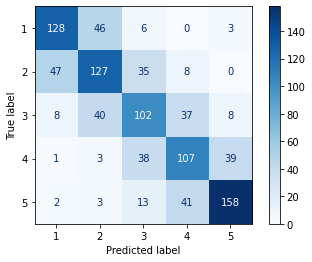

In [240]:
cm = confusion_matrix(y_true_final, y_pred_final, labels=[1, 2, 3, 4, 5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5])
disp.plot(cmap='Blues')

In [382]:
class_report = classification_report(y_true_final, y_pred_final, output_dict = True)
pd.DataFrame(class_report)

,1,2,3,4,5,accuracy,macro avg,weighted avg
precision,0.688172,0.579909,0.525773,0.554404,0.759615,0.622,0.621575,0.623366
recall,0.699454,0.585253,0.523077,0.569149,0.728111,0.622,0.621009,0.622000
f1-score,0.693767,0.582569,0.524422,0.561680,0.743529,0.622,0.621193,0.622581
support,183.000000,217.000000,195.000000,188.000000,217.000000,0.622,1000.000000,1000.000000


In [257]:
df_resultado = df.loc[idx_test].copy()
df_resultado['Classe_Real'] = y_true_final
df_resultado['Classe_Prevista'] = y_pred_final
df_resultado

,Unnamed: 0,Name,Likes,Review_Title,Date,Review_Type,Review_Body,Review_Classification,Language,Restaurant_name,comentario_limpo,Classe_Real,Classe_Prevista
4589,4589,lazytoad2001,0,Unassuming local spot great food,07/2015,couples,We visited off the back of the trip advisor re...,3,eng,O prado,we visited off the back of the trip advisor re...,4,5
8494,8494,Zehra B,1,Terrible,02/2017,friends,I was there with my friend today.I saw picture...,0,eng,Cervejaria Ruca,i was there with my friend todayi saw pictures...,1,1
12115,12115,Frederico C,1,Comida razoavel,03/2017,family,"Este restaurante apresenta um menu variado, co...",2,pt,Vincenzo,restaurante apresenta menu variado destaque ma...,3,4
2987,2987,SVLiberator3,0,Super authentic and delicious,06/2022,none,The food here is amazing for all palates. The ...,4,eng,O Portugues Chiado,the food here is amazing all palates the duck ...,5,2
10485,10485,Henrique Z,0,Indico,04/2018,couples,"Ótimo atendimento e ambiente, bebidas excelent...",3,pt,tapas Bar 52,ótimo atendimento ambiente bebidas excelentes ...,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13056,13056,FamilyofHarris,0,Not a bad meal in a very tourist location,10/2015,none,We were worried that the food might be below p...,2,eng,Nicola,we were worried that the food might be below p...,3,4
11448,11448,charleschristy07,0,As bad as it gets,12/2023,business,Terrible quality \nThe worst steak I have ever...,0,eng,Praia no Parque,terrible quality the worst steak i have ever h...,1,1
12305,12305,22clr,0,Bocage e o soneto amargo,01/2019,couples,"O ""Nicola"" teria pergaminhos para se afirmar c...",1,pt,Nicola,nicola pergaminhos afirmar clássico história m...,2,3
7427,7427,Patrícia F,0,"Boa comida, serviço rápido, bom preço",01/2015,friends,Esta pastelaria é também um restaurante. Relat...,3,pt,Namur II,pastelaria restaurante relativamente serviço p...,4,4


In [258]:
erros = df_resultado[df_resultado['Classe_Real'] != df_resultado['Classe_Prevista']].reset_index(drop=True)

In [259]:
erros

,Unnamed: 0,Name,Likes,Review_Title,Date,Review_Type,Review_Body,Review_Classification,Language,Restaurant_name,comentario_limpo,Classe_Real,Classe_Prevista
0,4589,lazytoad2001,0,Unassuming local spot great food,07/2015,couples,We visited off the back of the trip advisor re...,3,eng,O prado,we visited off the back of the trip advisor re...,4,5
1,12115,Frederico C,1,Comida razoavel,03/2017,family,"Este restaurante apresenta um menu variado, co...",2,pt,Vincenzo,restaurante apresenta menu variado destaque ma...,3,4
2,2987,SVLiberator3,0,Super authentic and delicious,06/2022,none,The food here is amazing for all palates. The ...,4,eng,O Portugues Chiado,the food here is amazing all palates the duck ...,5,2
3,10485,Henrique Z,0,Indico,04/2018,couples,"Ótimo atendimento e ambiente, bebidas excelent...",3,pt,tapas Bar 52,ótimo atendimento ambiente bebidas excelentes ...,4,5
4,3311,Daniela F,0,Não recomendo.,07/2017,friends,Óptima comida! O bife da casa estava impecável...,1,pt,Adega das gravatas,óptima comida bife casa impecável bolo bolacha...,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,4294,Silasboy_Lx,0,O sabor da cozinha típica portuguesa,11/2018,family,Nada como o sabor da comida típica portuguesa....,4,pt,O prado,nada sabor comida típica portuguesa comida ind...,5,3
374,8692,Deirdre G,0,Disappointing,03/2016,couples,Was lured into this restaurant by a very persu...,1,eng,Restaurante Marisqueira Popular,was lured into this restaurant by very persuas...,2,1
375,13056,FamilyofHarris,0,Not a bad meal in a very tourist location,10/2015,none,We were worried that the food might be below p...,2,eng,Nicola,we were worried that the food might be below p...,3,4
376,12305,22clr,0,Bocage e o soneto amargo,01/2019,couples,"O ""Nicola"" teria pergaminhos para se afirmar c...",1,pt,Nicola,nicola pergaminhos afirmar clássico história m...,2,3


In [261]:
erros.groupby(['Classe_Real', 'Classe_Prevista']).size().unstack(fill_value=0)

Classe_Prevista,1,2,3,4,5
Classe_Real,,,,,
1,0,46,6,0,3
2,47,0,35,8,0
3,8,40,0,37,8
4,1,3,38,0,39
5,2,3,13,41,0


In [334]:
erros[(erros['Classe_Real'] == 1) & (erros['Classe_Prevista'] == 5)][['Review_Body']].iloc[1].ravel().tolist()

['Venho cá imensas vezes, mas o atendimento cada vez está pior, nem bom dia, nem obrigado, nada mesmo...']

In [324]:
erros[(erros['Classe_Real'] == 2) & (erros['Classe_Prevista'] == 4)][['Review_Body']].iloc[2].ravel().tolist()

['Compramos pastel de Belém mas foi o brigadeiro que chamou a atenção.\nNão sentamos para comer no restaurante pois estava muito cheio (fomos andando pela rua Augusta beliscando as guloseimas).']

In [335]:
erros[(erros['Classe_Real'] == 3) & (erros['Classe_Prevista'] == 1)][['Review_Body']].iloc[0].ravel().tolist()

['A nao repetir!\nServiço nao profissional \nSalada polvo nao fresca\nVinho a copo sem identificação e vem embrulhado e aquecido pelas mãos do empregado']

In [343]:
erros[(erros['Classe_Real'] == 3) & (erros['Classe_Prevista'] == 1)][['Review_Body']].iloc[6].ravel().tolist()

['Desagradável experiência. Já fui várias vezes a este restaurante mas hoje tive uma péssima experiência. A carne de porco estava cheia de pêlo. Após um dos empregados perguntar se estava tudo bem e mostrarmos o sucedido, o mesmo disse que ia falar com a cozinheira mas não voltou nem com um pedido de desculpas nem com nada.']

In [344]:
erros[(erros['Classe_Real'] == 3) & (erros['Classe_Prevista'] == 5)][['Review_Body']].iloc[0].ravel().tolist()

['Jantar em familia,ambiente acolhedor e familiar,bons fados e boa comida! Em comparacao com os comentarios que li acerca deste restaurante,surpreeendeu-me.']

In [358]:
erros[(erros['Classe_Real'] == 5) & (erros['Classe_Prevista'] == 2)][['Review_Body']].iloc[1].ravel().tolist()

['We went there after reading comments about it. We were not disappointed, the place was packed and the waitress found us last spots outside. This place is busy and buzzing, people queuing for place to sit. Food was very tasty although menu is in Portuguese so check before what you wish to eat :) for 2 of us we paid approx 25 euros with drinks']

In [ ]:
erros.to_csv('erros_classificacao.csv', index=False)

## Elogios (NER)

In [7]:
df = pd.read_csv('tripAdvisor_reviews_complete_final.csv')
df

,Name,Likes,Review_Title,Date,Review_Type,Review_Body,Review_Classification,Language,Restaurant_name
0,Wagner B,0,ALMOÇO MARAVILHOSO,04/2025,family,Local excepcional. Todos os comentários feitos...,5 de 5 bolhas,pt,Floresta das escadinhas
1,Matheus A,0,Ótimo restaurante,04/2025,family,"Ótimo lugar, excelente comida, custo benefício...",5 de 5 bolhas,pt,Floresta das escadinhas
2,alan s,0,Excepcional,04/2025,couples,"Restaurante muito bom, agradavel e a manuela n...",5 de 5 bolhas,pt,Floresta das escadinhas
3,Felipe A,0,Uma ótima opção no centro,04/2025,couples,"Tivemos uma ótima experiência, o atendimento é...",5 de 5 bolhas,pt,Floresta das escadinhas
4,Lízzie F,0,Boa comida e preço,04/2025,friends,Fomos muito bem recebidas pelo Augusto \nÓtima...,5 de 5 bolhas,pt,Floresta das escadinhas
...,...,...,...,...,...,...,...,...,...
13250,Jerzy1969,0,They have lost attention to food quality and C...,undefined,undefined,We have stoopped for small meal with kids- had...,2 de 5 bolhas,eng,Nicola
13251,Valerie G,0,Try another restaurant,08/2011,none,We stayed in a hotel along the Avenida Liberda...,2 de 5 bolhas,eng,Nicola
13252,J and d.,0,Great location for Dining in Central Lisbon,09/2011,none,The location on a main square in Lisbon makes ...,4 de 5 bolhas,eng,Nicola
13253,fridayinla,0,Average dining with below average service.,undefined,undefined,Although the restaurant has a charmingly class...,3 de 5 bolhas,eng,Nicola


In [8]:
# Carrega os dois modelos apenas uma vez
nlp_pt = spacy.load("pt_core_news_lg")
nlp_eng = spacy.load("en_core_web_lg")

In [9]:
def aplicar_spacy(row):
    texto = row['Review_Body']
    lang = row['Language']
    if lang == 'pt':
        return nlp_pt(texto)
    elif lang == 'eng':
        return nlp_eng(texto)
    else:
        return None

df['doc'] = df.apply(aplicar_spacy, axis=1)

In [11]:
df['Review_Classification'] = df['Review_Classification'].str.replace(r'(\d+)\s+de\s+(\d+)\s+bolhas', r'\1/\2', regex=True)
df['Review_Classification'] = df['Review_Classification'].str.extract(r'(\d)/5').astype(int)

In [ ]:
doc = df['doc']

In [17]:
df['tokens_pos'] = df['doc'].apply(lambda doc: [(token.text, token.pos_) for token in doc])
df['entidades'] = df['doc'].apply(lambda doc: [(ent.text, ent.label_, ent.start) for ent in doc.ents])

In [18]:
df['tokens_pos']

0        [(Local, NOUN), (excepcional, ADJ), (., PUNCT)...
1        [(Ótimo, DET), (lugar, NOUN), (,, PUNCT), (exc...
2        [(Restaurante, NOUN), (muito, ADV), (bom, ADJ)...
3        [(Tivemos, VERB), (uma, DET), (ótima, ADJ), (e...
4        [(Fomos, AUX), (muito, ADV), (bem, ADV), (rece...
                               ...                        
13250    [(We, PRON), (have, AUX), (stoopped, VERB), (f...
13251    [(We, PRON), (stayed, VERB), (in, ADP), (a, DE...
13252    [(The, DET), (location, NOUN), (on, ADP), (a, ...
13253    [(Although, SCONJ), (the, DET), (restaurant, N...
13254    [(I, PRON), (must, AUX), (admit, VERB), (it, P...
Name: tokens_pos, Length: 13255, dtype: object

In [85]:
from collections import Counter

# Obter stopwords dos modelos spaCy
stopwords_pt = nlp_pt.Defaults.stop_words
stopwords_en = nlp_eng.Defaults.stop_words

elogios_keywords_pt = {
    # Simples
    'ótimo', 'excelente', 'fantástico', 'incrível', 'bom', 'boa',
    'maravilhoso', 'maravilhosa', 'espetacular', 'sensacional',
    'prestativo', 'prestativa', 'eficiente', 'amável', 'gentil',
    'simpático', 'simpática', 'atencioso', 'atenciosa', 'exemplar',
    'rápido', 'rápida', 'adoro', 'gostei', 'perfeito', 'perfeita',
    'útil', 'valioso', 'valiosa', 'agradecido', 'agradecida',

    # Compostos e expressões comuns
    'muito bom', 'muito boa', 'muito bem', 'bem feito', 'bem resolvido',
    'grande trabalho', 'trabalho excelente', 'trabalho impecável',
    'serviço impecável', 'resposta rápida', 'resposta clara',
    'grande ajuda', 'ajuda preciosa', 'ajuda excelente',
    'apoio fantástico', 'apoio impecável', 'atendimento excelente',
    'atendimento exemplar', 'serviço excelente', 'excelente atendimento',
    'excelente explicação', 'explicação clara', 'bem explicado',
    'com muita simpatia', 'trabalho incrível', 'atendimento fantástico',
    'resposta excelente', 'com grande profissionalismo',
    'apoio valioso', 'resolvido rapidamente', 'com clareza',
    'muito atencioso', 'muito prestável', 'experiência excelente',
    'excelente profissional', 'muito simpático', 'muito simpática',
    'melhor atendimento', 'nota máxima', 'sem palavras',
    'impecável serviço', 'muito útil', 'super simpático', 'muito obrigado',

    # Verbos ou frases de elogio
    'recomendo', 'altamente recomendável', 'elogio', 'agradeço', 
    'valorizei', 'apreciei', 'obrigado pelo apoio', 'obrigado pela ajuda',
    'foi impecável', 'superou expectativas'
}

elogios_keywords_en = {
    # Simples
    'great', 'excellent', 'amazing', 'awesome', 'perfect',
    'fantastic', 'wonderful', 'superb', 'outstanding', 'brilliant',
    'helpful', 'friendly', 'kind', 'polite', 'nice', 'lovely',
    'efficient', 'fast', 'quick', 'reliable', 'professional',
    'thoughtful', 'courteous', 'patient', 'understanding',
    'pleasant', 'supportive', 'attentive', 'skilled', 'knowledgeable',
    'greatest', 'top', 'competent', 'dedicated',

    # Expressões compostas
    'very good', 'really good', 'so good', 'so helpful', 'super helpful',
    'extremely helpful', 'very friendly', 'really friendly',
    'great help', 'big help', 'huge help', 'massive help',
    'excellent support', 'amazing support', 'wonderful service',
    'great service', 'quick response', 'fast response',
    'prompt reply', 'prompt service', 'well done', 'nicely done',
    'perfectly done', 'job well done', 'highly professional',
    'top quality', 'top-notch service', 'clear explanation',
    'detailed explanation', 'great job', 'fantastic job',
    'excellent job', 'outstanding work', 'impressive work',
    'brilliant work', 'lovely work', 'thanks a lot',
    'thank you so much', 'much appreciated', 'I appreciate it',
    'I really appreciate it', 'truly grateful', 'really impressed',
    'super quick', 'very responsive', 'above and beyond',
    'can’t thank you enough', 'awesome experience',
    'amazing experience', 'spot on', 'just perfect', 'incredibly helpful',

    # Verbos e frases
    'recommend', 'highly recommend', 'appreciate', 'grateful',
    'thankful', 'satisfied', 'pleased', 'impressed', 'delighted',
    'blown away', 'kudos', 'props to', 'hats off', 'shoutout to'
}

elogios_keywords = elogios_keywords_pt.union(elogios_keywords_en)

# Contadores finais
nomes_elogiados = Counter()
elogios_usados = Counter()
elogios_detalhados = []

# Processamento linha a linha
for _, row in df.iterrows():
    tokens_pos = row['tokens_pos']
    entidades = row.get('entidades', [])  # Lista de (nome, label, idx_inicial)

    # Criar índice → POS para verificação rápida
    
    pos_dict = {i: [pos,text] for i, (text, pos) in enumerate(tokens_pos)}

    # Filtra entidades do tipo 'PER'
    entidades_per = [
        (nome, idx) for nome, label, idx in entidades
        if label == 'PER' and nome.lower() not in elogios_keywords
    ]

    for i, (nome, idx_inicio) in enumerate(entidades_per):
        
        # Verificação Termo atual até termo seguinte
        if i + 1 < len(entidades_per):
            idx_fim = entidades_per[i + 1][1] 
        else:
            idx_fim = len(tokens_pos)
        
        # Verificação até \n à direita
        for i, v in pos_dict.items():
            if i > idx_inicio and i < idx_fim and '\n' in v[1]:
                
                idx_fim = i
                break
                
        if idx_inicio<3:
            idx_inicio_new = 0
        else:
            idx_inicio_new = idx_inicio - 3
        
        # Verificação até \n à esquerda
        for i, v in pos_dict.items():
            if i > idx_inicio_new and i < idx_inicio:
                if '\n' in v[1]:
                    
                    idx_inicio = i
                    break
                else:
                    idx_inicio = idx_inicio_new
        
        
        # Trecho entre esta entidade e a próxima
        trecho_tokens = tokens_pos[idx_inicio:idx_fim]
        
        trecho_texto = ' '.join([tok for tok, _ in trecho_tokens]).lower()
        
        elogios_encontrados = [e for e in elogios_keywords if e in trecho_texto]
        
        # VERIFICAÇÃO PROPN: só considera se o token for nome próprio
        if elogios_encontrados and pos_dict[idx_inicio][0] == 'PROPN':
            nomes_elogiados[nome] += 1
            for elogio in elogios_encontrados:
                elogios_usados[elogio] += 1

            # Salvar trecho do elogio com detalhes
            frase_elogio = ' '.join([tok for tok, _ in trecho_tokens])
            elogios_detalhados.append({
                'Nome': nome,
                'Elogios': elogios_encontrados,
                'Frase': frase_elogio
            })


#Exibir resultados
print("Nomes mais elogiados:")
for nome, count in nomes_elogiados.most_common():
    print(f"{nome}: {count} elogio(s)")

print("\n Elogios detalhados por pessoa:")
for elogio in elogios_detalhados:
    print(f"- {elogio['Nome']} → {', '.join(elogio['Elogios'])}")
    print(f"  Frase: {elogio['Frase']}")

Nomes mais elogiados:
Augusto: 3 elogio(s)
Bruno: 3 elogio(s)
Eurico: 3 elogio(s)
Although: 3 elogio(s)
Serviço: 2 elogio(s)
Nicola: 2 elogio(s)
Orlando: 1 elogio(s)
Nina: 1 elogio(s)
AMBIENTE ACONCHEGANTE: 1 elogio(s)
Amei: 1 elogio(s)
Letícia: 1 elogio(s)
peixa: 1 elogio(s)
lula: 1 elogio(s)
l i c i: 1 elogio(s)
Batata à Murro: 1 elogio(s)
Dificill: 1 elogio(s)
Comi Bife: 1 elogio(s)
Exms Srs: 1 elogio(s)
Único: 1 elogio(s)
Zagalo: 1 elogio(s)
Migas de Alheira: 1 elogio(s)
Eurico you still: 1 elogio(s)
Overpriced: 1 elogio(s)
Maria Jo Jo is incredible: 1 elogio(s)
Maria Jo Jo and her amazing voice is just stuning!: 1 elogio(s)
Maria José: 1 elogio(s)
Maria JoJô: 1 elogio(s)
Maria jojo: 1 elogio(s)
Dona: 1 elogio(s)
olives: 1 elogio(s)
Katia Garcia: 1 elogio(s)
I don't recommend this place at all!: 1 elogio(s)
Nope: 1 elogio(s)
nicely served: 1 elogio(s)
half liter instead: 1 elogio(s)
Arggh: 1 elogio(s)
grilled salmon: 1 elogio(s)
grilled prawns were very nice and the sardines were d

In [44]:
elogios_detalhados

[{'nome': 'Augusto \n',
  'elogios': ['bom', 'ótimo'],
  'trecho': 'Augusto \n Ótima comida e ótimo preço . \n Um bom lugar para visitar e comer comida tradicional portuguesa'},
 {'nome': 'Augusto',
  'elogios': ['boa', 'prestativo'],
  'trecho': 'Augusto que nos atendeu muito bem e foi muito prestativo e simpático . \n Se voltarmos a Lisboa , retornaremos com certeza . Recomendamos muito ! \n Apenas um detalhe : as mesas são bem próximas umas das outras , mas para nós nao foi um incômodo . Ambiente acolhedor e familiar .'},
 {'nome': 'Augusto',
  'elogios': ['atencioso'],
  'trecho': 'Augusto foi quem nos atendeu e foi extremamente simpático e atencioso ! Certamente voltaremos em uma próxima oportunidade ! ! !'},
 {'nome': 'Emanuela',
  'elogios': ['excelente'],
  'trecho': 'Emanuela e de todas as meninas foi excelente ! Ambiente tradicional e intimista ! Nós amamos !'},
 {'nome': 'Mercia',
  'elogios': ['simpatia'],
  'trecho': 'Mercia . \n A simpatia e destreza nos encantou !'},
 {'

Percebemos que existem elogios, mas captados de forma errada, pois,  por exemplo, o primeiro elogios, capta palavras direcionadas à comida e prato e não à entidade "Augusto". E percebemos que mais parte dos paragrafos -> após ("\n"), muda maior parte das vezes de tema.

Por isso, decidimos alterar a forma de balizamento para:

1. Quando encontrar **"\n"** termina o intervalo, quer à esquerda quer à direta
2. Definir uma janela que no máximo tenha 5 termos à esquerda. E à direta só para quando encontrar uma nova **entidade Nome**, ou se encontrar **"\n"**.